In [1]:
import pandas as pd
import os

lenetFD = pd.read_csv('./lenetFD.csv').set_index('Architecture')
lenetFD['model']='Lenet5'
mnasnetFD = pd.read_csv('./mnasnetFD.csv').set_index('Architecture')
mnasnetFD['model']='Mnasnet'
mobilenetFD = pd.read_csv('./mobilenetFD.csv').set_index('Architecture')
mobilenetFD['model']='Mobilenet V2'
resnetFD = pd.read_csv('./resnetFD.csv').set_index('Architecture')
resnetFD['model']='Resnet18'
squeezenetFD = pd.read_csv('./squeezenetFD.csv').set_index('Architecture')
squeezenetFD['model']='Squeezenet'

df_list = [lenetFD,
mnasnetFD,
mobilenetFD,
resnetFD,
squeezenetFD]

total_df = pd.concat(df_list)
total_df = total_df.reset_index()
print(total_df)

        Architecture  Critical SDC   Safe SDC     Masked         model
0           Baseline      3.309839  65.016579  31.673582        Lenet5
1   Adaptive Clipper      0.854614   9.238610  89.906775        Lenet5
2             Ranger      0.979747  33.251396  65.768857        Lenet5
3         Swap ReLU6      1.842521  39.734013  58.423466        Lenet5
4      Median Filter      1.605284  42.139463  56.255253        Lenet5
5           Baseline      8.431600  60.160289  31.408111       Mnasnet
6   Adaptive Clipper      8.175815  58.873195  32.950990       Mnasnet
7             Ranger      7.269857  56.421609  36.308534       Mnasnet
8         Swap ReLU6           NaN        NaN        NaN       Mnasnet
9      Median Filter           NaN        NaN        NaN       Mnasnet
10          Baseline      8.517044  90.208834   1.274122  Mobilenet V2
11  Adaptive Clipper      8.378723  90.563214   1.058063  Mobilenet V2
12            Ranger      8.380508  90.176844   1.442648  Mobilenet V2
13    

        Architecture  Critical SDC   Safe SDC     Masked         model
1   Adaptive Clipper      0.854614   9.238610  89.906775        Lenet5
6   Adaptive Clipper      8.175815  58.873195  32.950990       Mnasnet
11  Adaptive Clipper      8.378723  90.563214   1.058063  Mobilenet V2
16  Adaptive Clipper      8.873701  89.646270   1.480029      Resnet18
21  Adaptive Clipper      2.860486  86.362296  11.865373    Squeezenet


/tmp/ipykernel_55783/1462704469.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Faults (%)')

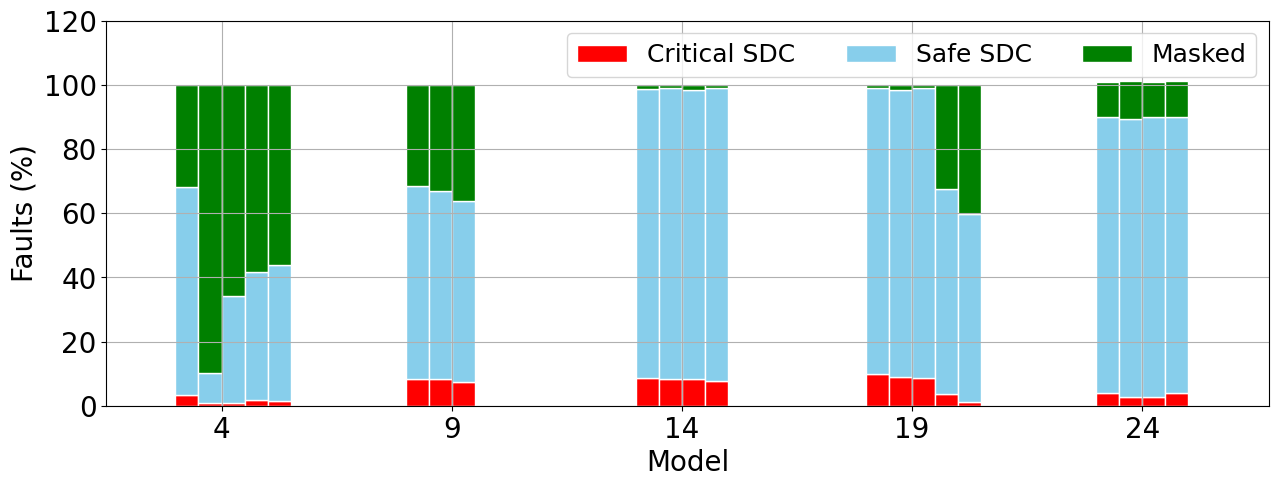

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,5))

new_order = ['Lenet5', 'Resnet18', 'Mobilenet V2', 'Mnasnet', 'Squeezenet']

BaseFD = total_df[total_df['Architecture']=='Baseline']#.reindex(new_order)
ACFD = total_df[total_df['Architecture']=='Adaptive Clipper']#.reindex(new_order)
RangerFD = total_df[total_df['Architecture']=='Ranger']#.reindex(new_order)
SRFD = total_df[total_df['Architecture']=='Swap ReLU6']#.reindex(new_order)
MFFD = total_df[total_df['Architecture']=='Median Filter']#.reindex(new_order)

print(ACFD)
BaseFD.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=2, edgecolor='white', width=0.1, ax = ax, legend=True, rot=0)
ACFD.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
RangerFD.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=0, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
SRFD.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
MFFD.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)

# app_mobimobilenet_fd.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=2, width=0.2, ax = ax, legend=False)
ax.set_xlabel('Model', fontsize=20)
ax.grid()
ax.set_xticklabels(labels = ax.get_xticklabels(), fontsize=20)
ax.set_yticklabels(labels = ax.get_yticklabels(), fontsize=20)
ax.set_xlim(left = -0.5)
ax.set_yticks(ax.get_yticks())
ax.legend(labels=['Critical SDC', 'Safe SDC', 'Masked'], ncol=3, fontsize=18)
ax.set_ylabel('Faults (%)', fontsize=20)

In [1]:

arch_map = {'': 'Baseline',
            'AC': 'Adaptive Clipper',
            'MF': 'Median Filter',
            'ranger': 'Ranger',
            'SR': 'Swap ReLU6',
            'TMR': 'TMR'
 }

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/") if file_path.startswith("FSIM_W_") and not file_path.endswith('gz')]
# print(log_folders)

general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
for layer_conf in log_folders:
    model = layer_conf.split('_')[3]
    architecture = ''
    if len(layer_conf.split('_')) == 5:
        architecture = layer_conf.split('_')[4]
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:
            # print(architecture)
            # if not (architecture == 'SR' and cnf=='lyr2_JOBID0_W'):
                file_path = os.path.join(folder_path, cnf)

                report_path = os.path.join(file_path, "fsim_full_report.csv")
                report = pd.read_csv(report_path)
                report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

                report.drop(columns=['Unnamed: 0'], inplace=True)
                report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                
                report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
                report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
                report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
                report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

                report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
                report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
                report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
                report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

                report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
                report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
                report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
                report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

                report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
                report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
                report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
                report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
                report['Architecture'] = arch_map[architecture]
                report['model'] = model
                general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

                new_path = os.path.join(file_path, "Misclassified_images_report.csv")
                additional_report = pd.read_csv(new_path)
                additional_report['model'] = 'LeNet5'
                additional_report['Architecture'] = arch_map[architecture]
                additional_report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                new_report = pd.concat([new_report, additional_report], axis=0, ignore_index=True)
                new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"



In [5]:
general_report.groupby(['Architecture', 'model'])['gold_ACC@1'].mean()

Architecture      model     
Adaptive Clipper  lenet         98.000000
                  mnasnet       83.000000
                  mobilenet     74.463187
                  resnet18      82.591948
                  squeezenet    82.500000
Baseline          lenet         98.000000
                  mnasnet       83.000000
                  mobilenet     78.991851
                  resnet18      85.727110
                  squeezenet    77.500000
Median Filter     lenet         96.000000
                  resnet18      76.000000
Ranger            lenet         98.000000
                  mnasnet       83.000000
                  mobilenet     77.887037
                  resnet18      85.916550
                  squeezenet    77.500000
Swap ReLU6        lenet         97.000000
                  mobilenet     84.358447
                  resnet18      77.000000
                  squeezenet    76.250000
Name: gold_ACC@1, dtype: float64

In [1]:
import torch
from torch import nn
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [17]:
from utils import profile
from torchvision import models

model = LeNet5(num_classes=10)
model = models.mobilenet_v2()

total_adds, total_subs, total_mults, total_divs, total_exps, total_comps, total_ops, total_params = profile(model, (1,3,32,32))
print("================================================")
print("#Additions: %f Ops"%(total_adds))
print("#Subtractions: %f Ops"%(total_subs))
print("#Multiplications: %f Ops"%(total_mults))
print("#Divisions: %f Ops"%(total_divs))
print("#Exponentials: %f Ops"%(total_exps))
print("#Comparisons: %f Ops"%(total_comps))
print("#Ops: %f Ops"%(total_ops))
print("#Parameters: %f M"%(total_params))
print("================================================")

weighted_avg = ((total_adds*2) + (total_subs*2) + (total_mults *3) + (total_divs*4) + total_comps)/11

print(weighted_avg)


#Additions: 7254840.000000 Ops
#Subtractions: 136288.000000 Ops
#Multiplications: 1280000.000000 Ops
#Divisions: 136288.000000 Ops
#Exponentials: 0.000000 Ops
#Comparisons: 498432.000000 Ops
#Ops: 15044152.000000 Ops
#Parameters: 3504872.000000 M
tensor([1787803.6250])


In [19]:
(1923739.6250 - 1787803.6250)/1787803.6250*100

7.603519653899349